## 4) KNN Classifier 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Methodology 

The following steps are performed to implement KNN

1. Get the feature vectors from trainning data and the feature vector of the test sample and set the value of "K" (k=5 in this program). 
2. Determine the distance (in feature space) between all the trainning data and the test sample and return the distance measurments. 
3. Select the top k samples from the test data which have the smallest distance to the test sample. 
4. Within the top k, conduct a voting process and return the class with the highest votes. This would be the resulting classification

In [21]:
## Funtion to return the L2 distance for a test sample and the trainning data 

def GetL2Distances( Dataset , x_sample ):
   
    Dataset = Dataset.T  # arrange the training data with n samples in the shape [ 4 , n ] 
    x_sample = np.reshape(x_sample , (4,1 )) 
    dist_vec = Dataset - x_sample # broadcast subtraction between train and test samples
    dist_vec = np.linalg.norm(dist_vec , axis = 0) # take norm as the distance measurment 
    
    return dist_vec # return a vector of distances between test sample and all trainning samples 


In [22]:
#  Function to return the top k classes in the trainning data that were closest to the test sample 

def GetClasses( euclidian_distance , labels  , k ):
    
    closest_index = np.argpartition(euclidian_distance , k  ) #  the argpartion function returns an array
    # with k-th element in its sorted location and all smaller 
    #elements will be moved before it and all larger elements behind it.
    
    classes = []
    
    for p in range(k): # accessing each index element 
        
        classes.append(  labels[ closest_index[p] ]  ) # store the corresponding class for each index 
            
    return classes 
     

In [23]:
def GetVotedClass(classes): # return the class with maximum number of votes
    return max(set(classes), key = classes.count)

In [24]:
# A trial block of code to check if the logic is working 

class_list = [ 'Iris-virginica' , 'Iris-versicolor' , 'Iris-setosa' ]
L2_distance = GetL2Distances(X_train ,X_test[15] )
classes =  GetClasses(L2_distance ,y_train , k=5  )
GetVotedClass(classes  )

'Iris-setosa'

In [25]:
numSamples = len(y_test)
Score =0 

for i in range( numSamples):
    L2_distance = GetL2Distances(X_train ,X_test[i] )
    classes =  GetClasses(L2_distance ,y_train , k=5  ) ## KNN with k =5 
    PredClass  = GetVotedClass(classes)
    
    if( PredClass ==y_test[i] ):
        Score +=1

        
print(" Accuracy = " + str(Score / numSamples ))


 Accuracy = 0.9666666666666667


## 5) Logistic Regression

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)


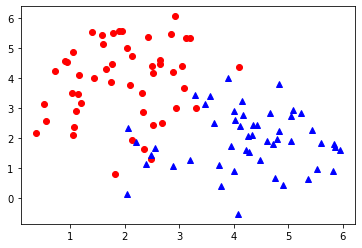

In [28]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


The function below implements the sigmoid operation, it is defined as 

$ \sigma(z) = P =  \frac{1}{ 1+ e^{-z}} $ 

Where $Z = WX + b$ and $P$ is the result of the predictions 




In [29]:
def sigmoid( z):
    
    val = 1/( 1 + np.exp(-z) )
    
    dim = np.shape(val)[0]
#     val = np.reshape( val , (dim , 1) )
    
    return val

In [30]:
num_points = np.shape(X)[0]
ones = np.ones( ( 100,  ))

# agumented_features = np.zeros( ( num_points , 3))
# agumented_features[: , 0] = ones
# agumented_features[: , 1:3] = X 

W = [ 0,0 ] # Initilize the weights and bias to 0 
b =0 
W = np.asarray(W)
# W = W/np.linalg.norm(W)


iterations = 10 
eta = 10*-3

The function below returns the cross entropy loss that is given by

$L = -\frac{1}{N} \Sigma_{i=1}^{N} Y_{i} \log{P_{i}}$                           

Where $Y$ is the true ground truth label and $P$ is the prediction from a classifier. 

The cross entropy for a binary classifier reduces to 

$L = -\frac{1}{N}\Sigma_{i=1}^{N} Y_{i} \log{P_{i}}  + (1-Y_{i}) \log(1-P_{i}) $            


In [31]:
# The Cross Entropy loss function 

def GetLoss( A2 , label ):
    Loss = (-1.0) * np.mean(np.multiply(label, np.log(A2)) 
                            + np.multiply(1.0-label, np.log(1.0 - A2)), axis=0) 
 
    
    return Loss

### Determine the gradients of binary cross entropy


$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial P}\frac{\partial P}{\partial W} $

$\frac{\partial L}{\partial P} = - \frac{1}{N} ( \frac{Y}{P} - \frac{1-Y}{1-P} )$

$ = - \frac{ Y-P }{P(1-P)}$

$P$ is the output of the sigmoid function its derivative is given by $P(1-P)$. 

$ \frac{\partial P}{\partial W} = P(1-P)X $

Therefore 

$\frac{\partial L}{\partial W} = -\frac{1}{N}X^{T}( Y-P) $


$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial P}\frac{\partial P}{\partial b} $

$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (P- Y) $

In [32]:
# the formulation described above has been programmed here

def GetGradients( A2, Y  , X ): 
    
    numPts = np.shape(Y)[0]
    Y = np.reshape( Y,  (numPts, 1) )
    A2  = np.reshape( A2 , (numPts, 1) )
    dw = (1/numPts)*( X.T  )@( A2 - Y )
    db = np.mean( A2 - Y , axis = 0 )
    
    dw = np.reshape( dw , (2, ))

    return dw , db 

In [33]:
# This is the main function that implements gradient descent for parameter updates 

def forward(W, b ,  X1 , label , lr):
    
    A1  = W@(X1.T) + b 
    A2  = sigmoid(A1) # Determine output of the activation function 
    Loss = GetLoss( A2 , label ) # calculate the loss by comparing against ground truth values 
    dw , db = GetGradients( A2, label  , X ) # determine the gradients 

    
    W = np.add( W, -lr*dw , casting='unsafe') # update the weights using gradient descent 
    b += -lr*db # update bias parameter 
    
    
    return W , b , Loss


In [34]:
lr = 10**-2
iterations = 1500
LossList = []
for p in range(iterations): #  implement 1500 iterations 
    
    W, b , Loss=  forward( W , b  , X , y , lr)
    LossList.append(Loss )


Text(0.5, 1.0, ' Loss vs Iterations Plot')

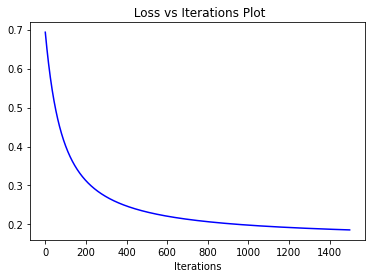

In [35]:
# visulization of the iteration vs loss plot we can observe that loss is decreasing monotonically 

Iters = np.arange( 0 , iterations , 1)
plt.plot(Iters, LossList  ,color='blue')
plt.xlabel("Loss")
plt.xlabel("Iterations")
plt.title(" Loss vs Iterations Plot")

In [36]:
X_axis =[]
Y_axis =[]
for i in range( 100):
    Y_val = -(1/W[0])*( b + W[1]*X[i][0] )  
    X_axis.append(X[i][0])
    Y_axis.append( Y_val)

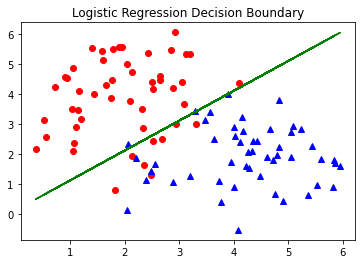

In [37]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.title("Logistic Regression Decision Boundary")
plt.plot(X_axis ,Y_axis  ,color='green')